In [8]:
# The following code is heavily expired by the code I found in the appendix to the lecture notes. 
# I adapted the replicator to mimic the QLD, but most of it remained the same.
# It was titled 'replicatorRPS - Sato, so it was probably also used to produced the plots found in the referenced paper
# by Sato et al.

import numpy as np 
import matplotlib.pyplot as plt
#import networkx as nx
from scipy.integrate import odeint, solve_ivp, ode 
from mpl_toolkits.mplot3d import Axes3D
from scipy import sparse 
import time as tm
from scipy.spatial.distance import pdist, squareform 
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [9]:
def replicator(t, x, A, B, T):

    boltzmann_term = np.zeros(6)
    for i in range(3):
        for j in range(3):
            if i != j:
                boltzmann_term[i] += x[j] * np.log(  x[j] / x[i])
    for i in range(3,6):
        for j in range(3,6):
            if i != j:
                boltzmann_term[i] += x[j] * np.log( x[j] / x[i] )
            
    #print(boltzmann_term)
    dx = np.zeros(6)
    dx[:3] = x[:3] * (A @ x[3:] - np.transpose(x[:3]) @ (A @ x[3:]) + T * boltzmann_term[:3])
    dx[3:] = x[3:] * (B.T @ x[:3] - np.transpose(x[:3]) @ (B @ x[3:]) +  T * boltzmann_term[3:])
    return dx

In [10]:
# Initial value
z0 = [0.25, 0.1, 0.65, 0.15, 0.75, 0.1]
# or = np. random.uniform(0.1, 0.2, 6).T
# Time parameters
t_step = 0.03
t_final = 100
time = np.arange(0, t_final, t_step)

#exploration parameter, temperature
T = 0.0
# Define matrices
epsilonx = 0.1
epsilony = -epsilonx

A = np.array([
    [epsilonx, 1, -1],
    [-1, epsilonx, 1],
    [1, -1, epsilonx]
])

BSato= np. array([[epsilony, 1 ,-1],
                 [-1, epsilony ,1], 
                  [ 1, -1 ,epsilony]])
B=BSato.T
#print ('A=' ,A)
#print('BSato=',BSato)
#print ('B=',B)
# integrate ODE
sol = solve_ivp(replicator, [0,t_final], y0=z0, method='DOP853', t_eval=time, args=(A,B,T))
xx = sol.y



average payoffs  0.03265471953073077 -0.03265471953073078


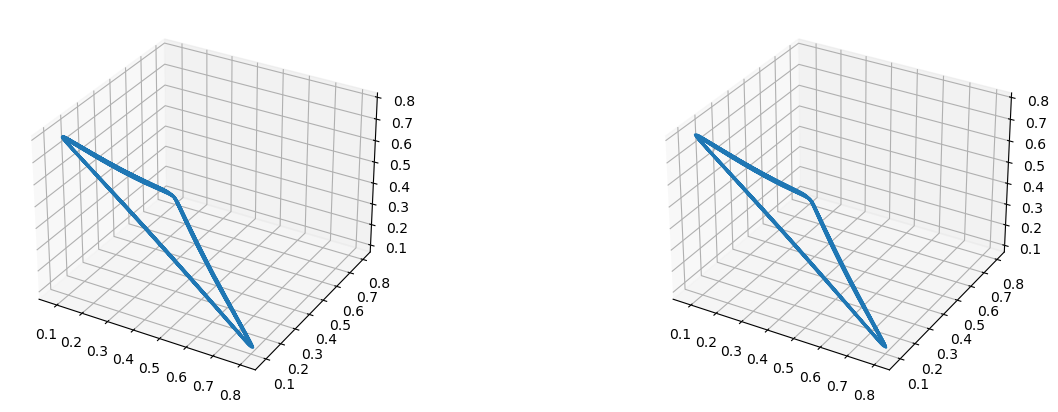

In [11]:

playerA = xx[:3,:]
playerB = xx[3:,:] # here there was a bug!!!
sum1 = 0
sum2 = 0
for i in range(playerA.shape[1]):
    sum1 += (np.transpose(playerA)[i,:] @ A @ playerB[:,i])
    sum2 += (np.transpose(playerA)[i,:] @ B @ playerB[:,i])



#print(np.sum(np.transpose(playerA) @ A @ playerB) )
av_payoff_1 = sum1/ playerA.shape[1]
av_payoff_2 = sum2 / playerA.shape[1]

print('average payoffs ' , av_payoff_1 , av_payoff_2)


transient = 10
#check whether the vectors stored in x remain probability vectors:
#s = np.zeros(xx.shape[1])
#s = xx[0,:] + xx[1,:] + xx[2,:]
#print(xx)
#print(50*'-')
#plt.plot(s)
#plt.plot (xx[4, :])
#plt.plot (xx[5, :])
plt.figure (figsize=(15,5))
plt.subplot (121, projection='3d')
plt.plot(xx[0,transient:], xx[1,transient:], xx[2,transient:]) #here I was plotting the wrong indices
plt.subplot (122, projection='3d')
plt.plot(xx[3,transient:], xx[4,transient:], xx[5,transient:]) #here I also fixed the indices.

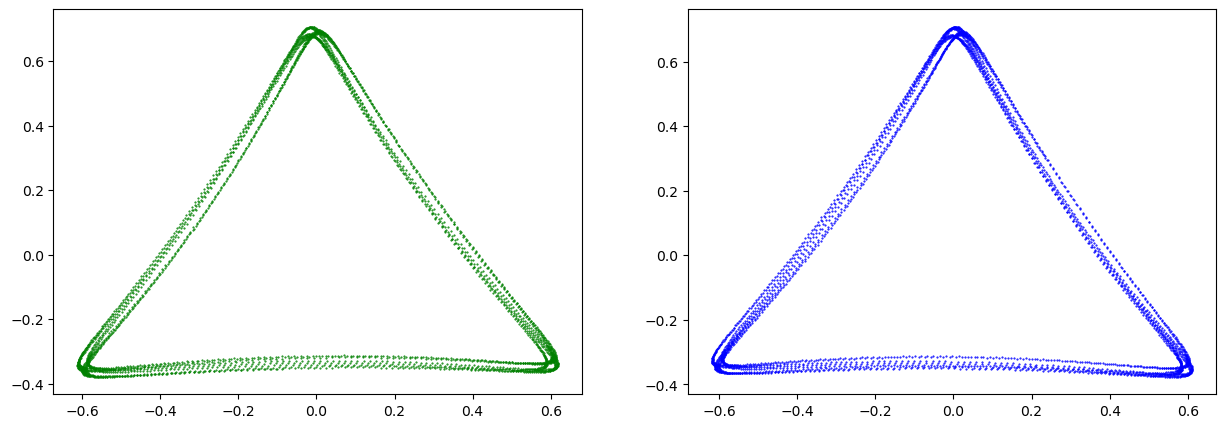

In [12]:
# define the projection to triangular coordinates
proj= np.array(
[[-1 * np.cos(30. / 360. * 2. * np.pi), np.cos(30. / 360. * 2. * np.pi),0.],
 [-1 * np.sin(30. / 360. * 2. * np.pi), -1 * np.sin(30. / 360. * 2. * np.pi), 1.]])

transient = 100

playerA = xx[0, transient:], xx[1,transient:], xx[2,transient:]
playerB = xx[3, transient:], xx [4,transient:], xx[5, transient:]
orbittriangle1 = proj@playerA 
orbittriangle2 = proj@playerB 
plt.figure (figsize=(15,5))

plt.subplot (121)
plt.plot(orbittriangle1[0] ,orbittriangle1[1],".",markersize=1,color='green')
plt.subplot (122)
plt.plot(orbittriangle2[0] ,orbittriangle2[1],".",markersize=1,color='blue')

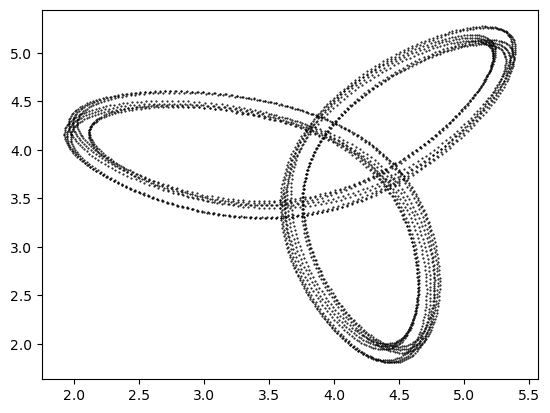

In [13]:
PROJ4D2D= np.array([[3.650, -1.350,1.35,5.35,1.35, 1.4500], [0.4,0.4,4.6,1.9,-0.4,4.4]])
XY = PROJ4D2D @ xx[:,:]
plt.plot (XY[0],XY[1],".",markersize=1, color='black')